In [3]:
import numpy as np
from scipy import integrate
from scipy.misc import derivative
import warnings
import matplotlib.pyplot as plt

In [4]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [20]:
def linear_combination_function(coefficients, basis_functions):
    def combined_function(x):
        return sum(c * f(x) for c, f in zip(coefficients, basis_functions))
    return combined_function

def trapezoidal_rule(func, x_inicial, x_final, num_points):
    x = np.linspace(x_inicial, x_final, num_points)
    y = func(x)
    h = (x_final - x_inicial) / (num_points - 1)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

def gaussian_quad(func, x_inicial, x_final, args=None):
    def_integral = integrate.quad(func, x_inicial, x_final)[0]
    return def_integral

def galerkin_method(basis_functions, fonte, funcionais, x_inicial, x_final, integration_method, args=None):
    #args = num_partitions caso integration_method == trapezoidal_rule]
    n = len(basis_functions)
    A = np.zeros((n, n))
    l = np.zeros(n) 

    funcional_incognita = funcionais['funcional_incognita']    
    funcional_fonte = funcionais['funcional_fonte']
    
    for i in range(n):
        for j in range(n):
            A[i, j] = funcional_incognita(basis_functions[i], basis_functions[j], integration_method, x_inicial, x_final, args)
            
        l[i] = funcional_fonte(basis_functions[i], fonte, integration_method, x_inicial, x_final, args)

    coef = np.linalg.solve(A, l)
    return coef

def plot_sol(X, sol_aproximada, sol_analitical):
    
    err = lambda x: sol_analitica(x) - sol_aproximada(x)
    
    plt.figure(figsize=(17,5))
    plt.plot(X, sol_aproximada(X), label="solução aproximada", linestyle='-', color='b')
    plt.plot(X, sol_analitica(X), label="solução analítica", linestyle='-', color='r')
    plt.plot(X, err(X), label="Erro", linestyle='--')
    plt.ylabel("y")
    plt.xlabel("x")
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.title("Comparação entre a solução aproximada e a analítica")
    
    plt.show()

    err_rel = integrate.simpson(np.sqrt(err(X)**2)) / integrate.simpson(np.sqrt(sol_analitica(X)**2))
    print(f'Erro relativo: {err_rel}')

### Poisson:

$$-u^{"}(x) = f(x), \quad \text{com} \quad u(x_{inicial})=u(x_{final})=0.$$

In [6]:
def funcional_incognita_Poisson(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_Poisson(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_Poisson = {'funcional_incognita': funcional_incognita_Poisson, 'funcional_fonte': funcional_fonte_Poisson}

In [22]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: np.sin(np.pi * x) / (np.pi)**2 
basis_func_2 = lambda x: x*(x-1)
basis_func_3 = lambda x: x*(x-1)**2
basis_func_4 = lambda x: (x**2)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4]

f = lambda x: np.sin(np.pi * x)

sol_analitica = lambda x: np.sin(np.pi * x) / (np.pi)**2 

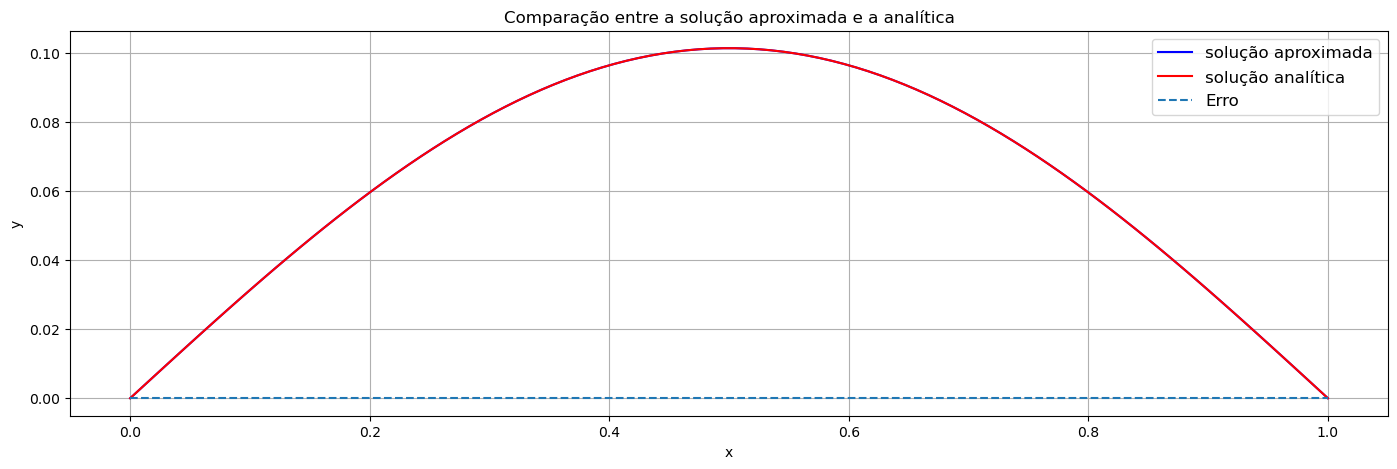

Erro relativo: 5.145362883216227e-08


In [25]:
coef_gaussian = galerkin_method(basis_functions, f, funcionais_Poisson, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 1: 

Problema $V$: Encontrar $u \in \mathbb{V}$ tal que

\begin{equation}
\int_0^1[u'v'+uv]\text{dx} = \int_0^1xv\text{dx}, \quad \forall v \in \mathbb{V}
\end{equation}

onde $\mathbb{V}$ é o espaço das funções diferenciáveis que satisfazem $v(0) = v(1) = 0$.

In [31]:
def funcional_incognita_1(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4) + func1(x)*func2(x)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_1(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_1 = {'funcional_incognita': funcional_incognita_1, 'funcional_fonte': funcional_fonte_1}

In [ ]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

f = lambda x: x

sol_analitica = expression = lambda x: -(np.exp(1 - x) - np.exp(1 + x) - x + np.exp(2) * x) / (1 - np.exp(2))

coef_gaussian = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)